<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Word_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np 
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import operator
import io
import sys
plt.rcParams['figure.figsize'] = (15,7)
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
data1 = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Deep%20NLP/Sheet_1.csv'
data2 = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Deep%20NLP/Sheet_2.csv'

In [13]:
df = pd.read_csv(data1,encoding="latin-1")
df = df.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6","Unnamed: 7"], axis = 1)
df = df.rename(columns={"v1":"class", "v2":"Responses"})

df.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [14]:
df.columns

Index(['response_id', 'class', 'response_text'], dtype='object')

In [5]:
df["class"].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [15]:
df2 = pd.read_csv(data2,encoding="latin-1")
df2 = df2.rename(columns={"v1":"class", "v2":"Resumes"})
df2.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [16]:
df2["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

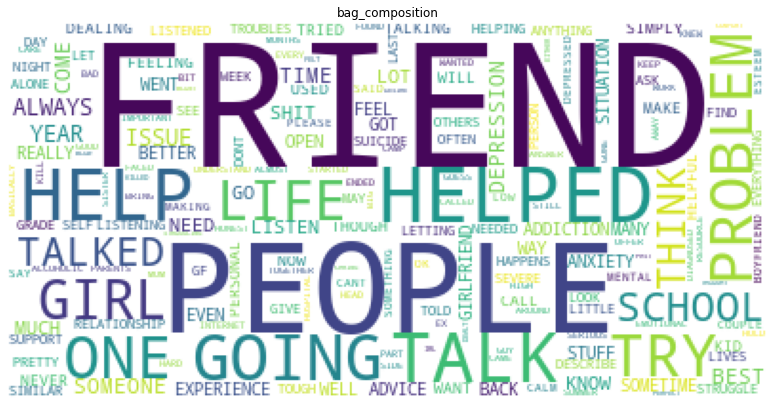

In [20]:
def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

wordcloud(df['response_text'])

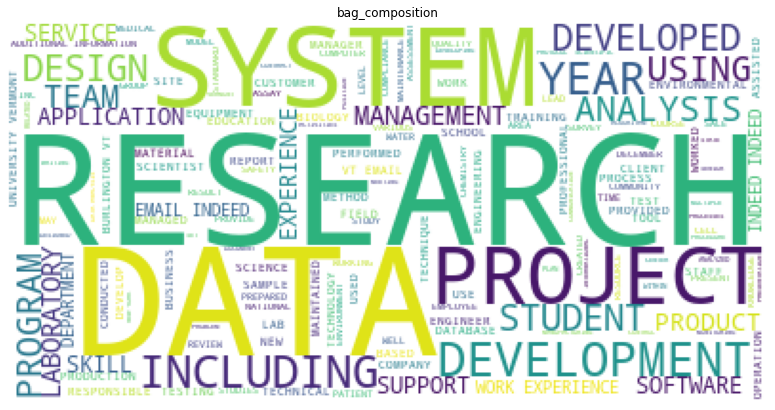

In [22]:
# Bag of resume words
wordcloud(df2['resume_text'])  


In [23]:
# Word Separation
def word_freq_bag(dataframe):

    counts = dict()
    bag = []
    counter = 0
    for line in dataframe:
        # print(line)
        words = line.split()
        # print(words)
        for each in words:
            bag.append(each)
    # print(bag)
    for word in bag:
        # print(word)
        # print(counts.get(word,0))
        counts[bag[counter]] = counts.get(word,0)+1        
        #print(counts)
        counter += 1
        
        # if counter == 50: # if you uncomment the print statements, use break (limited memory)
         #   break 

    key = None
    value = None
    keyvalue = dict() # would like to sort by count, dicts are orderless
    for key in counts:
        value = counts[key]
        keyvalue[key] = value
        # rank in descending order of frequency, get a list of tuples sorted by the second
        # element in each tuple
        valueSort1 = sorted(keyvalue.items(), key=operator.itemgetter(1), reverse = True)
        valueSort0 = sorted(keyvalue.items(), key=operator.itemgetter(0), reverse = False)
    # print(counter) # total number of non-unique words
    # print(len(valueSort1)) # every key has a value
    # print(len(valueSort0)) # so these return the same number
    return(valueSort1, valueSort0, counts) 

    
response_word_freq_bag = word_freq_bag(df['response_text'])
# take a look at the words picked out in ascending order of 1st letter 
print(response_word_freq_bag[1])


[('"', 1), ('"hand', 1), ('"please"', 1), ('(as', 1), ('(cocaine)', 1), ('(he', 1), ('(you', 1), ('1n', 1), ('2', 1), ('5', 2), ('50+', 1), ('A', 2), ('Agony', 1), ('Also', 1), ('Always.', 1), ('And', 1), ('Another', 1), ('Anxious', 1), ('Anyway', 1), ('As', 1), ('Aunt"', 1), ('Basically', 1), ('Before', 1), ('But', 2), ('By', 1), ('Cleaning', 1), ('Describe?', 1), ('Did', 1), ("Don't", 1), ('Ended', 1), ('Ex', 1), ('Friend', 3), ('Friends', 2), ("GED's.", 1), ('GF', 1), ('Had', 1), ('Haha.', 1), ('Have', 1), ('Having', 3), ('He', 4), ('Helped', 1), ('Helping', 1), ('Her', 1), ('His', 1), ('Hood', 1), ('I', 84), ("I'd", 2), ("I'll", 3), ("I'm", 5), ("I've", 5), ('Idk', 1), ('In', 1), ('Its', 1), ('LOT', 1), ('Last', 1), ('Let', 1), ('Listened', 1), ('Make', 1), ('Many', 1), ('Mt.', 1), ('My', 8), ('Nah', 1), ('Never', 1), ('Now', 2), ('Offered', 1), ('On', 1), ('One', 1), ('Only', 1), ('Over', 1), ('PLEASE', 1), ('People', 1), ('Probably', 1), ('Roommate', 1), ('She', 4), ('Simply', 2)

In [25]:
print(response_word_freq_bag[0]) 

[('to', 104), ('I', 84), ('and', 83), ('a', 60), ('the', 49), ('of', 44), ('was', 40), ('her', 36), ('my', 33), ('with', 31), ('for', 29), ('it', 26), ('me', 24), ('in', 24), ('that', 24), ('as', 24), ('she', 21), ('friend', 20), ('him', 20), ('have', 20), ('friends', 20), ('through', 20), ('people', 19), ('when', 18), ('about', 17), ('but', 17), ('be', 16), ('i', 15), ('he', 15), ('helped', 14), ('had', 14), ('some', 13), ('help', 13), ('they', 12), ('talk', 12), ('them', 12), ('there', 12), ('up', 11), ('going', 10), ('who', 10), ('just', 10), ('try', 9), ('out', 9), ('would', 9), ('on', 9), ('their', 9), ('so', 9), ('been', 9), ('from', 8), ('talked', 8), ('one', 8), ('get', 8), ('being', 8), ('at', 8), ('My', 8), ('his', 7), ('think', 7), ('is', 7), ('if', 7), ('or', 7), ('always', 7), ('what', 7), ('best', 7), ('him.', 7), ('this', 6), ('how', 6), ('girl', 6), ('because', 6), ('someone', 6), ('same', 6), ('not', 6), ('can', 6), ('go', 6), ('come', 6), ('open', 5), ('any', 5), ('sc

In [26]:
train_df = df.sample(frac = 0.5, axis=0)
test_df = df.sample(frac = 0.5, axis=0)

train_df2 = df2.sample(frac = 0.5, axis=0)
test_df2 = df2.sample(frac = 0.5, axis=0)

train_df_flagged = train_df.loc[train_df['class'] == 'flagged']
train_df_flagged_bag = word_freq_bag(train_df_flagged['response_text'])
print(train_df_flagged_bag[0]) # for example, here you can see the flagged responses' words
train_df_not_flagged = train_df.loc[train_df['class'] == 'not_flagged']
train_df_not_flagged_bag = word_freq_bag(train_df_not_flagged['response_text'])
train_df2_flagged = train_df2.loc[train_df2['class'] == 'flagged']
train_df2_flagged_bag = word_freq_bag(train_df2_flagged['resume_text'])
train_df2_not_flagged = train_df2.loc[train_df2['class'] == 'not_flagged']
train_df_not_flagged.tail() # it's a random sample, so the entries are not ordered, but
# you can see that you are indexing what you want - here's a subset of not_flagged responses
train_df2_not_flagged_bag = word_freq_bag(train_df2_not_flagged['resume_text'])


[('to', 26), ('and', 23), ('her', 20), ('I', 15), ('the', 14), ('was', 12), ('in', 10), ('as', 10), ('when', 9), ('a', 8), ('of', 8), ('my', 8), ('she', 8), ('with', 7), ('through', 6), ('it', 6), ('him', 5), ('had', 5), ('me', 5), ('have', 5), ('that', 5), ('i', 5), ('for', 5), ('what', 5), ('friend', 4), ('from', 4), ('get', 4), ('some', 4), ('people', 4), ('be', 4), ('this', 4), ('but', 4), ('Having', 3), ('he', 3), ('friends', 3), ('find', 3), ('addiction', 3), ('would', 3), ('everything', 3), ('helped', 3), ('My', 3), ('anxiety', 3), ('help', 3), ('they', 3), ('all', 3), ('out', 2), ('issues', 2), ('while', 2), ('self', 2), ('experience', 2), ('his', 2), ('come', 2), ('or', 2), ("they've", 2), ('who', 2), ('killed', 2), ('try', 2), ('comfort', 2), ('because', 2), ('best', 2), ('so', 2), ('up', 2), ('being', 2), ('school,', 2), ('go', 2), ('him.', 2), ('went', 2), ('few', 2), ('now', 2), ('But', 2), ('5', 2), ('depression', 2), ('personal', 2), ('used', 2), ('better', 2), ('underst

In [27]:
def score(a, b):
    mykey=[sum(value * a.get(key,0) for key,value in b.items())]
    # print(b.items())
    # print(a)
    # print(b)
    # global score_counter
    # score_counter += 1
    # if score_counter == 10: # to limit memory so you can run without needing to restart
    #     sys.exit()
    return(mykey)

def classifier_accuracy(text_type, text_id, test_dataframe, train_dataframe_flagged,
                        train_dataframe_flagged_bag, 
                        train_dataframe_not_flagged_bag, length):
    counter = 0
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    random_guess = 1-len(train_dataframe_flagged)/length
    test_dataframe_flagged = test_dataframe.loc[test_dataframe['class'] == 'flagged']
    positive_text = len(test_dataframe_flagged)
    print(positive_text)
    test_dataframe_not_flagged = test_dataframe.loc[test_dataframe['class'] == 'not_flagged']
    negative_text = len(test_dataframe_not_flagged)
    print(negative_text)
    
    # print(train_dataframe_flagged_bag[2])
    for i in test_dataframe[text_id]:
        split_char = i.split('_') # get id from resume_id
        integer = int(float(split_char[1])) -1 # acess by index, one less that resume_id
        text_class = test_dataframe['class'][integer]
        # print(text_class)
        # print(text_class)
        text = test_dataframe[text_type][integer]
        # convert string to dataframe, make more than wide enough for the text column
        df3 = pd.read_fwf(io.StringIO(text), header=None, widths=[1000000], names=[text_type])
        # df3 # if you want to see the dataframe for the response/resume
        text_bag = word_freq_bag(df3[text_type]) 
        # print(text_bag[2])
        # print("ok, here goes:")
        
        
        score_flagged = score(text_bag[2], train_dataframe_flagged_bag[2]) # 2 is counts dict
        #print(score_flagged)
        score_not_flagged = score(text_bag[2], train_dataframe_not_flagged_bag[2])
        #print(score_not_flagged)
        if score_flagged > score_not_flagged and text_class == 'flagged':
            counter += 1
            true_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'not_flagged':
            counter += 1
            true_negative += 1
        elif score_flagged > score_not_flagged and text_class == 'not_flagged':
            counter += 0
            false_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'flagged':
            counter += 0
            false_negative += 1
    return('number of test examples: ' + str(length), 'correct identifications: ' + str(counter), 'pick_randomly_performace: ' + str(random_guess), 'model_performance: ' + str(counter/length), 'false negatives: ' + str((positive_text-false_negative)/positive_text), 'false positives: ' + str((positive_text-true_positive)/positive_text), 'false positive count: ' + str(false_positive) , 'false negative count: ' + str(false_negative))

score_counter = 0
print(classifier_accuracy('response_text', 'response_id', test_df, train_df_flagged, train_df_flagged_bag, train_df_not_flagged_bag, 40))
print(classifier_accuracy('resume_text', 'resume_id', test_df2, train_df2_flagged, train_df2_flagged_bag, train_df2_not_flagged_bag, 62))
    

15
25
('number of test examples: 40', 'correct identifications: 33', 'pick_randomly_performace: 0.725', 'model_performance: 0.825', 'false negatives: 0.6666666666666666', 'false positives: 0.3333333333333333', 'false positive count: 2', 'false negative count: 5')
17
45
('number of test examples: 62', 'correct identifications: 45', 'pick_randomly_performace: 0.7258064516129032', 'model_performance: 0.7258064516129032', 'false negatives: 0.0', 'false positives: 1.0', 'false positive count: 0', 'false negative count: 17')


In [28]:
vect = CountVectorizer()
train_df = df.sample(frac = 1, axis=0)  # set this to 0.5, you'll have a 
                                        # test set of 40 responses
train_df_mat = vect.fit_transform(train_df['response_text'])
print(train_df_mat.shape) 
# to split into a train and test set, make the sample frac = 0.5, and you will get
# ~ 250-500 words in a sum total of half of the responses
# list of words represented in this train set
print(vect.get_feature_names())
# confirm number of words is 660 (and note the omission of the 832 - 660 = 172 words that were 
# caught with CountVectorizer. For example, below "themselves" & "themselves," are rolled
# together into one "themselves".) 
# This is a benefit of sklearn.
print(len(vect.get_feature_names()))

(80, 660)
['1n', '50', 'able', 'about', 'above', 'absolutely', 'acquaintances', 'acted', 'actions', 'activity', 'addiction', 'adequate', 'admit', 'advice', 'advise', 'after', 'age', 'ago', 'agony', 'alcoholic', 'all', 'allowed', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'an', 'and', 'anniversary', 'another', 'answer', 'answers', 'anxiety', 'anxious', 'any', 'anyone', 'anything', 'anyway', 'apposed', 'are', 'aren', 'around', 'as', 'ask', 'asks', 'at', 'attention', 'aunt', 'avoid', 'away', 'back', 'bad', 'basically', 'be', 'because', 'bedroom', 'been', 'before', 'being', 'best', 'better', 'big', 'bit', 'blow', 'blows', 'blue', 'blunt', 'book', 'both', 'boyfriend', 'break', 'bring', 'brother', 'brought', 'bunch', 'but', 'by', 'call', 'called', 'calling', 'calls', 'calm', 'came', 'camp', 'camping', 'campsite', 'can', 'cancer', 'cant', 'car', 'care', 'caring', 'categories', 'caught', 'cause', 'chance', 'change', 'changed', 'chat', 'circumstances', 'clean', '

In [29]:
# repeat for resume set
# Again, CountVectorizer, significantly decreases the number of words (down from ~17k to ~11k).
vect2 = CountVectorizer()
train_df2 = df2.sample(frac = 1, axis=0) # if the frac is changed to 0.5, 
                                         # get 62 resumes (0.5(floor(125))) ✔️️
                                         # ~ 6-9k words in a sum total of half 
                                         # of the resumes, depending on the sample  
df2_mat = vect2.fit_transform(train_df2['resume_text'])
print(df2_mat.shape)  

(125, 11466)
